# RSI 因子分析（技术面反转因子）

**研究基础**: 《如何基于RSI技术指标构建有效的选股因子》研究报告

**因子特征**:
- **类型**: 技术指标，反转因子
- **方向**: 做多低 RSI 股票（超卖反弹）
- **增强**: 成交量加权版本，提高因子稳健性

**核心思想**:
- RSI (Relative Strength Index) 相对强弱指数，衡量价格动量
- RSI 值越低表示超卖，预期未来反弹概率高
- 结合换手率加权，使因子对成交活跃度敏感

**分析流程**:
1. 导入标准化因子库函数
2. 配置回测参数
3. 执行因子计算与回测
4. 分析业绩表现与 IC
5. 可视化结果
6. 总结与优化建议

In [ ]:
# ========================================
# 步骤 1: 导入标准化因子库
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 添加项目根目录到路径
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# 导入 RSI 因子标准化函数
from factor_library.technical.rsi_factor import run_rsi_factor_backtest

print("✅ RSI 因子库导入成功")
print(f"项目根目录: {project_root}")

项目根目录已设置为: /Users/nachuanchen/Documents/Undergrad_Resources/投资学/Factor_strategy_platform


## 步骤 2: 配置回测参数

根据研究报告和实践经验配置 RSI 因子参数：
- **lookback_period**: RSI 计算周期（默认 20 天）
- **use_volume_weighted**: 是否使用换手率加权（推荐开启）
- **long_direction**: 'low' 做多低 RSI（反转策略）
- **rebalance_freq**: 调仓频率（周度/月度）

In [ ]:
# ========================================
# 步骤 2: 配置回测参数
# ========================================
config = {
    # 时间范围
    'start_date': '2020-01-01',
    'end_date': '2023-12-31',
    
    # RSI 参数
    'lookback_period': 20,           # RSI 计算周期
    'use_volume_weighted': True,     # 使用成交量加权版本
    
    # 回测参数
    'rebalance_freq': 'weekly',      # 调仓频率
    'transaction_cost': 0.0003,      # 0.03% 交易费用
    'long_direction': 'low',         # 做多低 RSI（超卖反弹）
}

print("回测配置:")
for key, value in config.items():
    print(f"  {key}: {value}")

开始执行数据加载与清洗任务...

[步骤 1/4] 正在加载CSV文件...
所有CSV文件加载成功！

[步骤 2/4] 正在进行数据预处理...
 -> 行情数据处理完成，已计算后复权价。
 -> 财务数据处理完成。
 -> 指数数据处理完成。

[步骤 3/4] 正在合并行情与财务数据...
行情与财务数据合并成功！

[步骤 4/4] 正在进行最终清洗...
 -> 已对财务数据进行缩尾处理。

数据加载与清洗任务完成！

主数据加载成功，预览:


open   high    low  close   adjfactor       volume  \
date       stock_code                                                        
2024-01-02 000001.SZ    9.39   9.42   9.21   9.21   71.643514  115836645.0   
           000002.SZ   10.44  10.48  10.15  10.15  181.703787   81110629.0   
           000004.SZ   16.10  16.44  16.05  16.14    4.063862    2886700.0   
           000005.SZ    1.08   1.12   1.08   1.12    9.267603    6302800.0   
           000006.SZ    4.58   4.60   4.45   4.47   39.739675   26194719.0   

                                amt   mkt_cap_ard      turn    adj_close  \
date       stock_code                                                      
2024-01-02 000001.SZ   1.075742e+09  1.787285e+11  0.596925   659.836764   
           000002.SZ   8.307655e+08  1.210967e+11  0.834735  1844.293438   
           000004.SZ   4.679115e+07  2.136618e+09  2.285805    65.590733   
           000005.SZ   6.967071e+06  1.185561e+09  0.595758    10.379715   
           000006.SZ   1.176632e+08  6.034478e+09  1.940368   177.636347   

                          adj_open report_date  ROE_AVG     ROA2  CATOASSETS  \
date       stock_code                                                          
2024-01-02 000001.SZ    672.732596  2023-12-31  10.2436      NaN         NaN   
           000002.SZ   1896.987536  2023-12-31   4.9294   1.9955     76.4368   
           000004.SZ     65.428178  2023-12-31 -57.2888 -35.8637     78.4352   
           000005.SZ     10.009011  2023-12-31 -17.9094  -8.1847     56.6478   
           000006.SZ    182.007711  2023-12-31 -10.7927  -1.3205     84.0593   

                       ASSETSTOEQUITY  CURRENT  
date       stock_code                           
2024-01-02 000001.SZ          11.8289      NaN  
           000002.SZ           3.7347   1.3997  
           000004.SZ           2.1326   1.6630  
           000005.SZ           2.1801   1.6617  
           000006.SZ           3.4829   1.7350

## 步骤 3: 执行因子计算与回测

使用标准化函数 `run_rsi_factor_backtest()` 一键完成：
1. 加载并准备数据
2. 计算 RSI 因子值
3. 执行分组回测
4. 计算 IC 和业绩指标

In [ ]:
# ========================================
# 步骤 3: 执行因子计算与回测
# ========================================
results = run_rsi_factor_backtest(**config)

print("\n" + "=" * 60)
print("回测执行完成！")
print("=" * 60)

[因子构建] 初始化成交量配合RSI因子计算器，回看周期为 20 天。

[因子计算] 正在计算 vw_rsi_20 (成交量配合RSI因子)...
vw_rsi_20 计算完成！

成交量配合RSI因子计算完成，预览:


,,factor
date,stock_code,
2024-01-30,000001.SZ,49.740622
2024-01-31,000001.SZ,50.796767
2024-02-01,000001.SZ,51.969446
2024-02-02,000001.SZ,50.718709
2024-02-05,000001.SZ,51.677759


## 步骤 4: 分析业绩表现

查看回测核心指标：
- **夏普比率**: 风险调整后收益
- **年化收益**: 策略年化表现
- **最大回撤**: 风险控制情况
- **IC 分析**: 因子预测能力

In [ ]:
# ========================================
# 步骤 4: 分析业绩表现
# ========================================

# 提取业绩指标
metrics = results['performance_metrics']

print("RSI 因子策略业绩总结 (Long_Only):")
print("-" * 50)
print(f"夏普比率:   {metrics['sharpe_ratio']:.3f}")
print(f"总收益:     {metrics['total_return']:.2%}")
print(f"年化收益:   {metrics['annualized_return']:.2%}")
print(f"年化波动:   {metrics['volatility']:.2%}")
print(f"最大回撤:   {metrics['max_drawdown']:.2%}")
print(f"调仓次数:   {metrics['rebalance_count']}")

# IC 分析
ic_series = results['analysis_results']['ic_series']
if ic_series is not None and not ic_series.empty:
    print("\nIC 分析:")
    print("-" * 50)
    print(f"IC 均值:    {ic_series.mean():.4f}")
    print(f"IC 标准差:  {ic_series.std():.4f}")
    icir = ic_series.mean() / ic_series.std() if ic_series.std() > 0 else np.nan
    print(f"ICIR:       {icir:.4f}")
    print(f"IC>0 占比:  {(ic_series > 0).mean():.2%}")
    print("\n💡 注意: RSI 是反转因子，通常 IC 为负（做多低 RSI）")
else:
    print("\n⚠️  IC 分析数据不可用")

# 显示详细指标表
print("\n详细业绩指标:")
display(results['analysis_results']['metrics'])

Backtest Engine initialized. Long direction set to: 'low'

[Backtest] Starting vectorized backtest...
 -> Step 1: Data alignment and merge complete.
 -> Step 2: Stocks grouped into 5 portfolios based on 'rsi_20'.
 -> Step 3: Daily group returns calculated.
 -> Strategy: Long Group_1, Short Group_5
 -> Step 4: Long-Short portfolio constructed correctly.
[Backtest] Backtest execution finished!

回测完成，各投资组合每日收益率预览：


,Group_1,Group_2,Group_3,Group_4,Group_5,Long_Short,Long_Only
date,,,,,,,
2024-01-29,-0.032456,-0.031311,-0.028380,-0.027722,-0.023544,-0.008913,-0.032456
2024-01-30,-0.049915,-0.050399,-0.044452,-0.042698,-0.031294,-0.018621,-0.049915
2024-01-31,-0.021178,-0.021978,-0.024663,-0.020000,-0.033502,0.012323,-0.021178
2024-02-01,-0.050401,-0.043328,-0.028553,-0.021755,-0.019852,-0.030549,-0.050401
2024-02-02,-0.083688,-0.085305,-0.069117,-0.057510,-0.030789,-0.052899,-0.083688


## 步骤 5: 可视化分析

绘制四个核心图表：
1. **累计收益曲线**: 策略净值走势
2. **因子分布**: RSI 值的统计特征
3. **回撤曲线**: 风险暴露情况
4. **IC 时间序列**: 因子稳定性

Performance Analyzer initialized.

[Performance Analysis] Calculating portfolio performance metrics...
Portfolio Performance Metrics:
            Annualized Return  Annualized Volatility  Sharpe Ratio  \
Group_1               -0.4334                 0.3934       -1.1017   
Group_2               -0.2929                 0.3673       -0.7975   
Group_3               -0.2835                 0.3034       -0.9344   
Group_4               -0.2425                 0.2700       -0.8985   
Group_5               -0.3437                 0.2330       -1.4749   
Long_Short            -0.1369                 0.3199       -0.4279   
Long_Only             -0.4334                 0.3934       -1.1017   

            Max Drawdown  Information Ratio (vs Benchmark)  
Group_1          -0.2388                               NaN  
Group_2          -0.1987                               NaN  
Group_3          -0.1573                               NaN  
Group_4          -0.1606                               NaN  


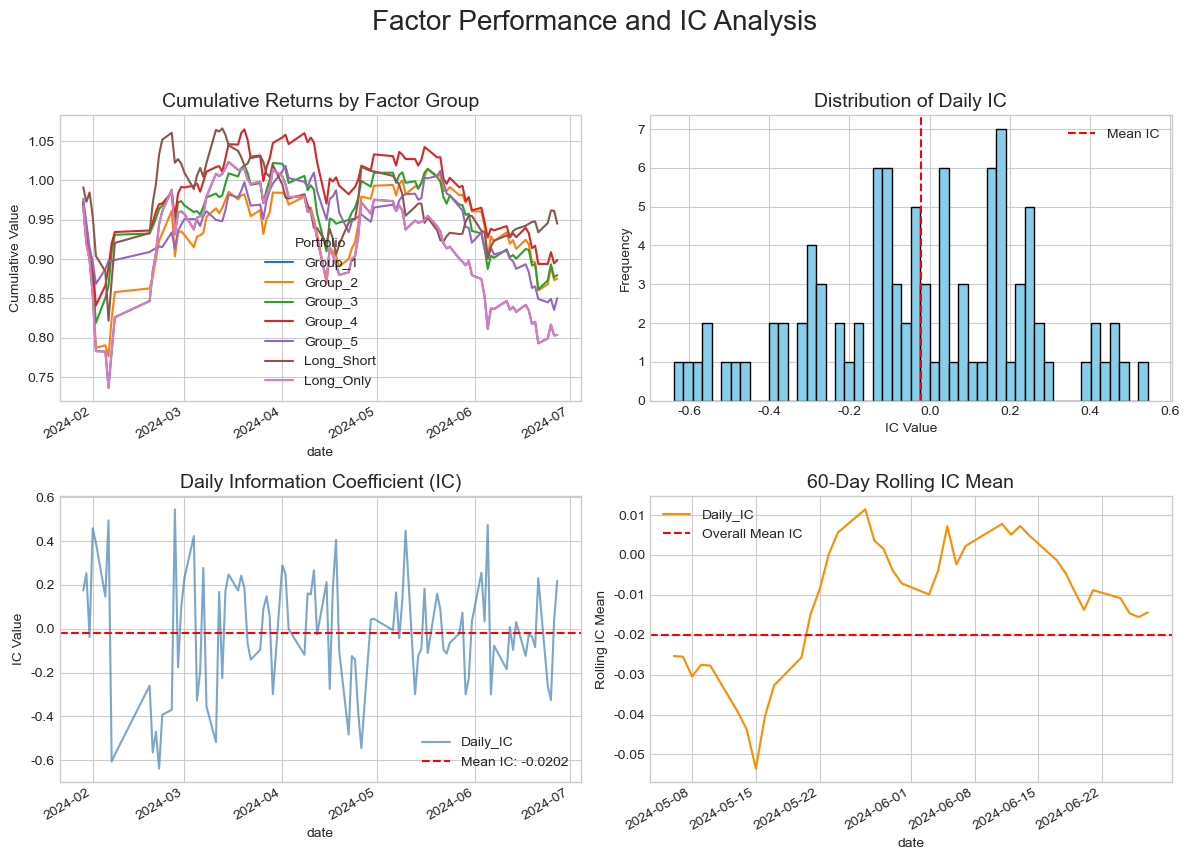

Plotting complete.


In [ ]:
# ========================================
# 步骤 5: 可视化分析
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. 累计收益曲线
portfolio_returns = results['portfolio_returns']
if 'Long_Only' in portfolio_returns.columns:
    cumulative = (1 + portfolio_returns['Long_Only']).cumprod()
    axes[0, 0].plot(cumulative.index, cumulative.values, label='RSI 策略', linewidth=2)
    axes[0, 0].set_title('累计收益曲线', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('日期')
    axes[0, 0].set_ylabel('累计净值')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

# 2. 因子分布
factor_values = results['factor_data']['factor'].values
axes[0, 1].hist(factor_values, bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].axvline(np.median(factor_values), color='red', linestyle='--', 
                   label=f'中位数: {np.median(factor_values):.2f}')
axes[0, 1].set_title('RSI 因子值分布', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('RSI 值')
axes[0, 1].set_ylabel('频数')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. 回撤曲线
running_max = cumulative.cummax()
drawdown = (cumulative / running_max - 1) * 100
axes[1, 0].fill_between(drawdown.index, drawdown.values, 0, alpha=0.3, color='red')
axes[1, 0].plot(drawdown.index, drawdown.values, color='darkred', linewidth=1)
axes[1, 0].set_title('回撤曲线', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('日期')
axes[1, 0].set_ylabel('回撤 (%)')
axes[1, 0].grid(True, alpha=0.3)

# 4. IC 时间序列
if ic_series is not None and not ic_series.empty:
    axes[1, 1].plot(ic_series.index, ic_series.values, alpha=0.6, label='IC')
    axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[1, 1].axhline(ic_series.mean(), color='red', linestyle='--', 
                      label=f'均值: {ic_series.mean():.4f}')
    axes[1, 1].set_title('IC 时间序列', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('日期')
    axes[1, 1].set_ylabel('IC 值')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'IC 数据不可用', ha='center', va='center')
    axes[1, 1].set_title('IC 时间序列', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 步骤 6: 总结与优化建议

### 因子特性总结
- **RSI 反转因子**: 做多低 RSI（超卖）股票，捕捉反弹机会
- **成交量增强**: 换手率加权提高因子稳健性
- **技术指标**: 纯价量信息，无需财务数据

### 优化方向
1. **参数调优**: 
   - 测试不同 lookback_period（10/15/20/30 天）
   - 调整调仓频率（日度/周度/月度）
   
2. **因子组合**:
   - 与动量因子结合（RSI+MACD）
   - 与基本面因子叠加（RSI+ROE）
   
3. **风险控制**:
   - 添加止损机制
   - 行业中性化处理
   - 市值分层回测

4. **信号优化**:
   - RSI 背离信号（价格与 RSI 背离）
   - 超买超卖阈值动态调整
   - 多周期 RSI 组合

### 进一步分析
- 分年度表现稳定性
- 不同市场环境下的有效性
- 与市场基准对比
- 行业/板块归因分析